# Supervised machine learning: Regression

### Content
1. Importing libraries and data
2. Data cleaning
3. Prepare data for regression analysis
4. Regression analysis
5. Improve training sets
6. Export data

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Lara\Career Foundry Projects\Wake County Housing Market 2023'

# Import csv data file using os library
df = pd.read_csv (os.path.join(path, 'Data','Prepared Data', 'single_homes_with_maps.csv'), index_col = False)

In [3]:
df.shape

(306560, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306560 entries, 0 to 306559
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   real_estate_id           306560 non-null  int64  
 1   deeded_acreage           306560 non-null  float64
 2   total_sale_price         306560 non-null  int64  
 3   assessed_building_value  306560 non-null  int64  
 4   assessed_land_value      306560 non-null  int64  
 5   year_built               306560 non-null  int64  
 6   units                    306560 non-null  int64  
 7   heated_area              306560 non-null  int64  
 8   utilities                306560 non-null  object 
 9   addition_year            306560 non-null  int64  
 10  effective_year           306560 non-null  int64  
 11  remodeled_year           306560 non-null  int64  
 12  story_height             306560 non-null  object 
 13  design_style             306560 non-null  object 
 14  bath

## 2. Data cleaning

In [5]:
# Rename column ZIPNUM back to zip_code
df.rename(columns = {'ZIPNUM' : 'zip_code'}, inplace = True)

There are no missing values or duplicates and majority of outliers were removed in previous task. It is highly unlikely that this will lead to bias, as I decided to narrow down scope of my analysis from all residental homes to only single family, and from all single family to only those that were re-sold at least once and have less than 10 acreas of land.

I want to test these 2 hypothesis:
1. Bigger houses have greater sale price.
2. Older houses have smaller sale price.

### Check for outliers

C:\Users\Lara\AppData\Local\Temp\ipykernel_19988\2708807908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_sale_price'], bins = 'auto')


<Axes: xlabel='total_sale_price', ylabel='Density'>

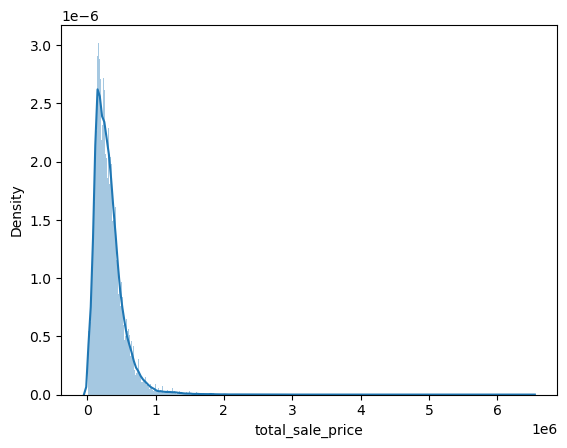

In [6]:
sns.distplot(df['total_sale_price'], bins = 'auto')

C:\Users\Lara\AppData\Local\Temp\ipykernel_19988\2456056001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_sale_price'], bins = 25)


<Axes: xlabel='total_sale_price', ylabel='Density'>

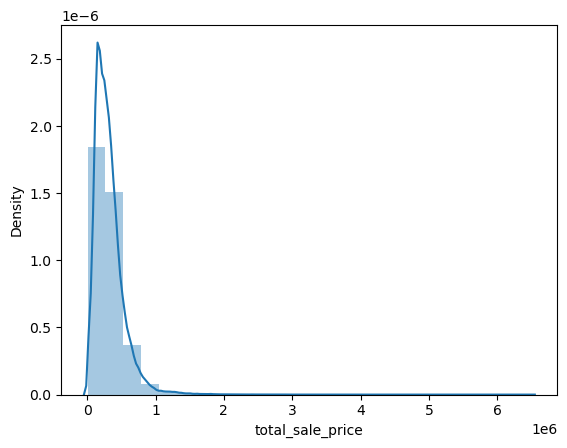

In [7]:
sns.distplot(df['total_sale_price'], bins = 25)

## Prepare data for regression analysis

### 1. Hypothesis : Bigger houses have greater sale price.
Independent variable here is heated_area and dependent is total_sale_price.

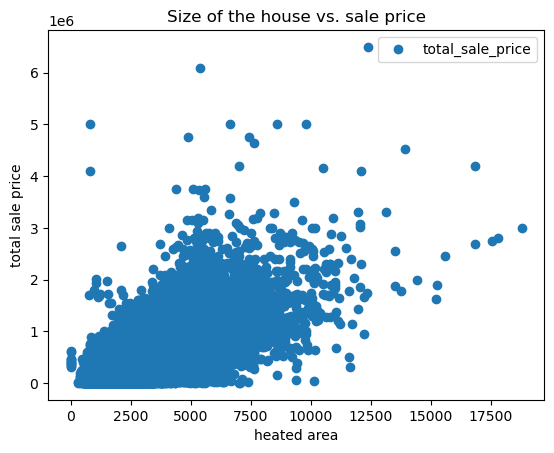

In [8]:
# Plot a scatterplot to compare heated_area against total_sale_price
df.plot(x = 'heated_area', y = 'total_sale_price', style = 'o')
plt.title('Size of the house vs. sale price')  
plt.xlabel('heated area')  
plt.ylabel('total sale price')  
plt.show()

### 2. Hypothesis : Older houses have smaller sale price.
Independent variable here is house_age and dependent is total_sale_price.

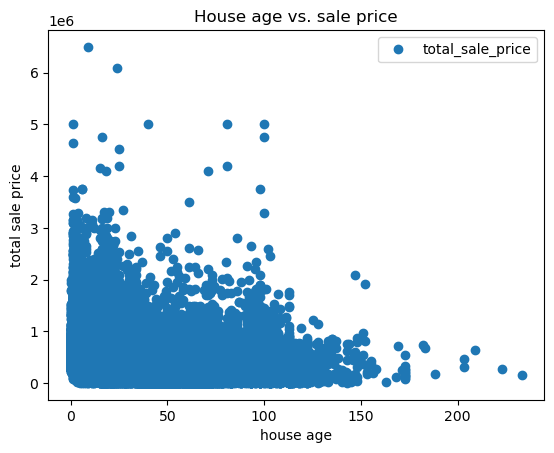

In [9]:
# Create a scatterplot to compare house_age against total_sale_price
df.plot(x = 'house_age', y = 'total_sale_price', style = 'o')
plt.title('House age vs. sale price')  
plt.xlabel('house age')  
plt.ylabel('total sale price')  
plt.show()

Comment: It looks like variables heated_area and total_sale_price would be a better fit for supervised machine learning.

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['heated_area'].values.reshape(-1,1)
y = df['total_sale_price'].values.reshape(-1,1)

In [11]:
X

array([[1828],
       [1240],
       [2261],
       ...,
       [1445],
       [1875],
       [1799]], dtype=int64)

In [12]:
y

array([[ 34500],
       [ 35500],
       [ 37500],
       ...,
       [443500],
       [460000],
       [706500]], dtype=int64)

In [13]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
X_train.shape

(214592, 1)

In [15]:
X_test.shape

(91968, 1)

In [16]:
y_train.shape

(214592, 1)

In [17]:
y_test.shape

(91968, 1)

## 4. Regression analysis

In [18]:
# Create regression object and fit it onto the training set
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict y with X
y_pred = reg.predict(X_test)

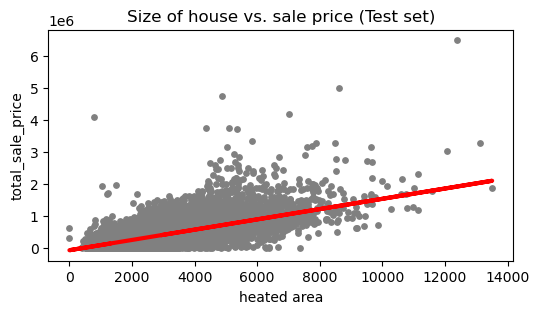

In [20]:
# Create a plot with the regression line from the model
plot_test = plt
plot_test.figure(figsize = (6, 3))
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth = 3)
plot_test.title('Size of house vs. sale price (Test set)')
plot_test.xlabel('heated area')
plot_test.ylabel('total_sale_price')
plot_test.show()

### Model summary statistics

In [21]:
# Print model summary statistics
print('Slope:' ,reg.coef_)
print(f'R2 Score is : {r2_score(y_test,y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

Slope: [[160.52651672]]
R2 Score is : 0.5085617186334594
Mean squared error: 23681771488.342724


In [22]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data.head(30)

,Actual,Predicted
0,430000,419421.137850
1,340000,439326.425923
2,211000,248620.924064
3,350000,439968.531990
4,896000,697132.011770
5,188000,245731.446763
6,280000,235618.276210
7,429000,419260.611334
8,360000,290197.291894
9,132000,379931.614738


### Compare how the reggression fits training set

In [23]:
# Predict X_train
y_pred_train = reg.predict(X_train)

In [24]:
# Print model summary statistics
print('Slope:' ,reg.coef_)
print(f'R2 Score is : {r2_score(y_train,y_pred_train)}')
print(f'Mean squared error: {mean_squared_error(y_train,y_pred_train)}')

Slope: [[160.52651672]]
R2 Score is : 0.5200073139641186
Mean squared error: 23589941299.164513


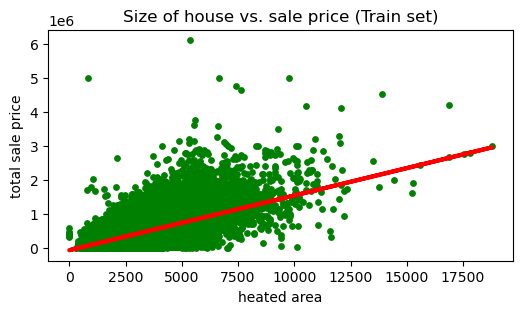

In [25]:
# Visualizing the training set results.
plot_test = plt
plot_test.figure(figsize = (6, 3))
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_pred_train, color = 'red', linewidth = 3)
plot_test.title('Size of house vs. sale price (Train set)')
plot_test.xlabel('heated area')
plot_test.ylabel('total sale price')
plot_test.show()

#### Comment:

Mean squared error is huge. This indicates that this model is not a good fit for this variables at all. It can be seen in printed first 30 rows that predicted values are off by more than 100 K in some rows. That's why MSE is over 23.6 trillion!

Another proof this was not a good model is similar results when running it onto training sets.

I will remove some values from total_sale_price to see if it will be better.

## 5. Improve training sets

In [26]:
# Remove all prices higher than 2 million (Those are very expensive houses)
df_subset = df[df['total_sale_price'] <= 2000000] 

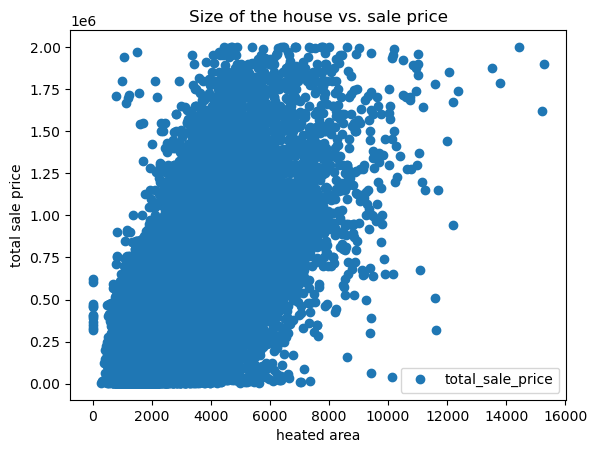

In [27]:
# Plot the new scatterplot
df_subset.plot(x = 'heated_area', y = 'total_sale_price', style = 'o')
plt.title('Size of the house vs. sale price')  
plt.xlabel('heated area')  
plt.ylabel('total sale price')  
plt.show()

In [28]:
# Reshape the variables again
X_2 = df_subset['heated_area'].values.reshape(-1,1)
y_2 = df_subset['total_sale_price'].values.reshape(-1,1)

In [29]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)

In [30]:
# Run and fit the regression.
reg_2 = LinearRegression()  
reg_2.fit(X_train_2, y_train_2)

LinearRegression()

In [31]:
# Predict y_2 with X_2
y_pred_2 = reg_2.predict(X_test_2)

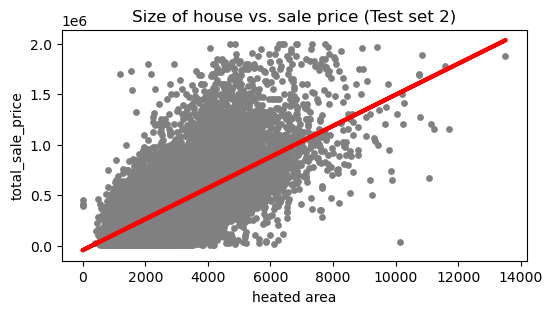

In [32]:
# Create a plot with the regression line from the model
plot_test = plt
plot_test.figure(figsize = (6, 3))
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_pred_2, color = 'red', linewidth = 3)
plot_test.title('Size of house vs. sale price (Test set 2)')
plot_test.xlabel('heated area')
plot_test.ylabel('total_sale_price')
plot_test.show()

In [33]:
# Print model summary statistics
print('Slope:' ,reg_2.coef_)
print(f'R2 Score is : {r2_score(y_test_2,y_pred_2)}')
print(f'Mean squared error: {mean_squared_error(y_test_2, y_pred_2)}')

Slope: [[153.72367682]]
R2 Score is : 0.5195280559787047
Mean squared error: 20987416022.747467


In [34]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_pred_2.flatten()})
data.head(30)

,Actual,Predicted
0,504000,721093.120113
1,266000,302964.719167
2,355000,327867.954812
3,206000,234865.130337
4,536000,564448.693435
5,407000,351080.230011
6,270000,379672.833900
7,151000,168302.778274
8,450000,210576.789399
9,177000,322487.626123


#### Comment:

Results just slightly improved, which solidifies conclusion that this is not a good model for these 2 variables.

Because of that I am still not rejecting hypothesis " Bigger houses are more expensive."

#### Next steps:

Maybe I should adjust historical prices to today's dollar worth by using CPI (consumer price index) and rerun this model.

## 6. Export data

In [35]:
# Export df_res as csv file
df.to_csv(os.path.join(path, 'Data','Prepared Data', 'single_homes_new.csv'), index = False)